Dataset Preview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

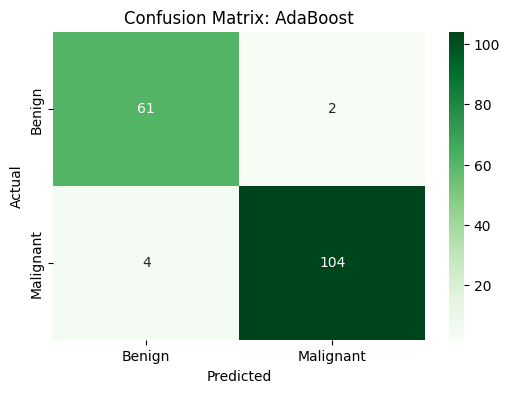

In [1]:
# ----------------------------------------------------
# 1) Import Libraries
# ----------------------------------------------------
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------
# 2) Load Dataset (Breast Cancer)
# ----------------------------------------------------
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print("Dataset Preview:")
print(df.head())

# ----------------------------------------------------
# 3) Select Features & Target
# ----------------------------------------------------
X = df.drop("target", axis=1)
y = df["target"]

# ----------------------------------------------------
# 4) Train-Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5) Feature Scaling (recommended for AdaBoost)
# ----------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------------------
# 6) Build AdaBoost Model
# ----------------------------------------------------
model = AdaBoostClassifier(
    n_estimators=100,      # number of weak learners
    learning_rate=0.5,     # shrinkage parameter
    random_state=42
)

model.fit(X_train_scaled, y_train)

# ----------------------------------------------------
# 7) Predictions
# ----------------------------------------------------
y_pred = model.predict(X_test_scaled)

# ----------------------------------------------------
# 8) Evaluation
# ----------------------------------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ----------------------------------------------------
# 9) Confusion Matrix
# ----------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix: AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
